<a href="https://colab.research.google.com/github/poonamaswani/DataScienceAndAI/blob/main/CAM_DS_C101_4_2_4_Gower_example(P1_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this example set up and ready to use.

# Gower example

In this notebook, you will engage with an example of the Gower distance metric.



In [ ]:
!pip install gower

In [ ]:
import pandas as pd
import gower
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load data set directly from UCI repository.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adult_df = pd.read_csv(url, header=None, names=columns, na_values=' ?', skipinitialspace=True)

# Drop missing values for simplicity.
adult_df.dropna(inplace=True)

In [ ]:
adult_df.shape

(32561, 15)

In [ ]:
# Use a subset of columns and rows (first 5,000 rows) for this example.
subset_df = adult_df[['age', 'education', 'marital-status', 'occupation', 'hours-per-week', 'income']].iloc[:5000]

In [ ]:
subset_df.shape

(5000, 6)

In [ ]:
subset_df.head()

,age,education,marital-status,occupation,hours-per-week,income
0,39,Bachelors,Never-married,Adm-clerical,40,<=50K
1,50,Bachelors,Married-civ-spouse,Exec-managerial,13,<=50K
2,38,HS-grad,Divorced,Handlers-cleaners,40,<=50K
3,53,11th,Married-civ-spouse,Handlers-cleaners,40,<=50K
4,28,Bachelors,Married-civ-spouse,Prof-specialty,40,<=50K


In [ ]:
# Compute Gower distance.
gower_dist = gower.gower_matrix(subset_df)

In [ ]:
# Apply t-SNE (try with different values of perplexity).
tsne = TSNE(metric='precomputed', perplexity=15, init='random', random_state=42)
tsne_results = tsne.fit_transform(gower_dist)

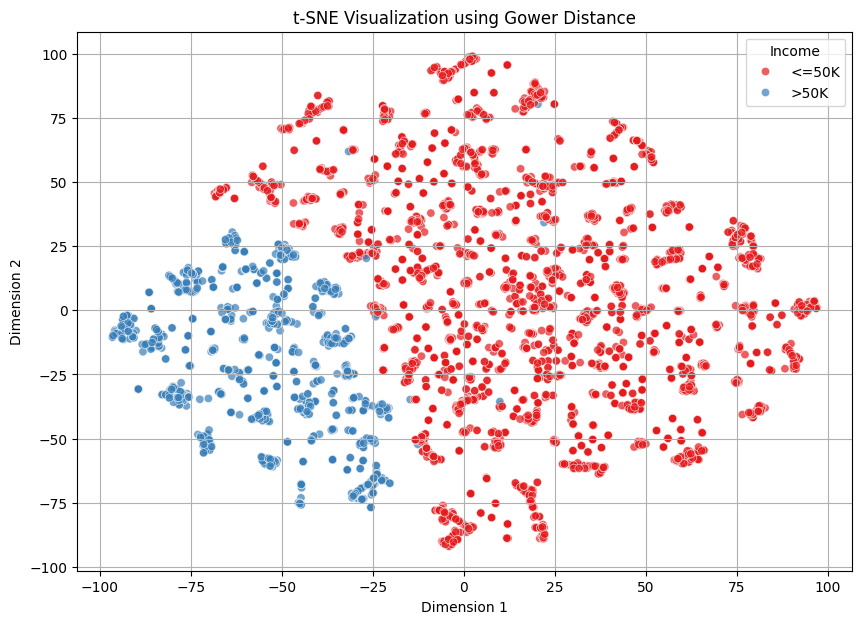

In [ ]:
# Plot using income category for colouring.
plt.figure(figsize=(10, 7))
sns.scatterplot(x=tsne_results[:, 0],
                y=tsne_results[:, 1],
                hue=subset_df['income'],
                palette='Set1',
                alpha=0.7)

plt.title('t-SNE Visualisation using Gower distance')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Income')
plt.grid(True)
plt.show()